# Demo for `mastersign.datascience.plot`

In [1]:
import pandas as pd
import numpy as np

Import the `mastersign.datascience.plot` package.

In [2]:
from mastersign.datascience import plot as pl

Create demo data.

In [3]:
np.random.seed(12345)
data_1 = pd.DataFrame(
    {
        "id": [101, 102, 103, 104, 105, 106],
        "name": ["alpha", "beta", "gamma", "delta", "epsilon", "zeta"],
        "color": ['orange', '#C0FF00', '#00E0B0', '#0080FF', '#B040FF', '#FF0080'],
        "value": [12, 24, 4, 54, 34, 16],
        "group": ["A", "B", "A", "C", "C", "B"],
        "group2": ["X", "Y", "X", "Y", "X", "Y"],
        "group3": ["a", "a", "b", "b", "c", "c"],
    },
    index=[1, 2, 3, 4, 5, 6])

data_2 = pd.DataFrame(
    {
        "t": np.arange(0.0, 100.0, 0.1),
        "group": np.random.choice(['A', 'B', 'C'], 1000, p=[0.5, 0.2, 0.3]),
        "value_a": np.random.normal(size=1000),
        "value_b": np.random.gamma(2, size=1000),
        "value_c": np.random.laplace(size=1000),
        "value_d": np.random.normal(size=1000),
    })
data_3 = pd.DataFrame(
    {
        "t": np.tile(np.arange(0, 10, 0.5), 4),
        "group": np.concatenate([np.repeat(c, 20) for c in ['A', 'B', 'C', 'D']]),
        "subgroup": np.tile(['X', 'Y'], 20 * 2),
        "value": np.random.normal(size=20 * 4),
    })
data_4 = pd.DataFrame(
    {
        "latitude": np.random.normal(size=100) * 0.5 + 53.5,
        "longitude": np.random.normal(size=100) * 1 + 10.0,
        "value_a": np.random.normal(size=100),
        "value_b": np.random.gamma(2, size=100),
    })

## `spec_col_labels()` / `spec_col_file()`

The plotting functions in this package support an automatic conversion from the original column names (index labels on axis 1) in the Pandas DataFrames to human friendly labels.

A map with pairs of column names an labels or an INI file can be used to to configure the labels.

Configure default labels for column names.

In [4]:
column_labels = {
    'count': 'Count',
    'name': 'Name',
    'id': '#',
    'value': 'Value',
    'value_a': 'Value A',
    'value_b': 'Value B',
    'value_c': 'Value C',
    'value_d': 'Value D',
    'group': 'Group',
    'group2': 'Group II',
    'group3': 'Group III',
    'class': 'Class',
}
pl.spec_col_labels(**column_labels)

## `table()`

Display table with all columns and rows including the DataFrame index.

In [5]:
pl.table(data_1)

index,#,Name,color,Value,Group,Group II,Group III
1,101,alpha,orange,12,A,X,a
2,102,beta,#C0FF00,24,B,Y,a
3,103,gamma,#00E0B0,4,A,X,b
4,104,delta,#0080FF,54,C,Y,b
5,105,epsilon,#B040FF,34,C,X,c
6,106,zeta,#FF0080,16,B,Y,c


Display customized table.

In [6]:
pl.table(data_1,
         columns=['name', 'group'],
         labels=['NAME', 'Class'],
         with_index=False,
         limit=3)

NAME,Class
alpha,A
beta,B
gamma,A


## `pie()`

Display the values of one column as a pie chart.

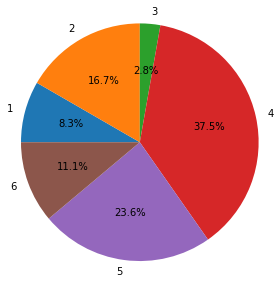

In [7]:
pl.pie(data_1, 'value')

Specify colors to cycle through and a different start angle.

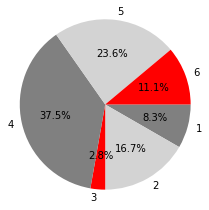

In [8]:
pl.pie(data_1, 'value', color=['grey', 'lightgrey', 'red'],
       startangle=0,
       figsize=(3, 3))

Specify color by index or label and arrange sections counterclockwise.

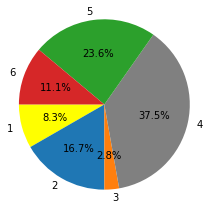

In [9]:
pl.pie(data_1, 'value', color={1: 'yellow', 4: 'grey'},
       counterclock=True,
       figsize=(3, 3))

Specify color with additional column.

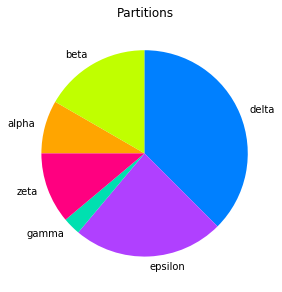

In [10]:
pl.pie(data_1, 'value', label_column='name', sort_by='label',
       color_column='color', title="Partitions", pct=False)

## `pie_groups()`

Display the size of groups in a data set.

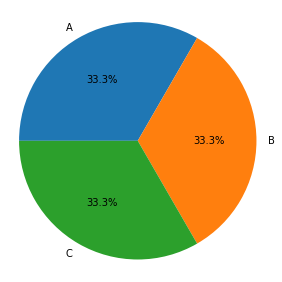

In [11]:
pl.pie_groups(data_1, 'group')

Sort the sections by `value` or `label`.
Specify the colors by label, add a title, and suppress the percentage numbers.

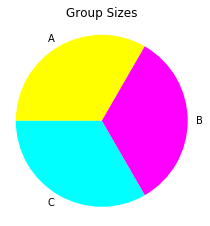

In [12]:
pl.pie_groups(data_1, 'group', sort_by='value',
              color={'A': 'yellow', 'B': 'magenta', 'C': 'cyan'},
              title="Group Sizes", pct=False, figsize=(3, 3))

## `bar()`

Display a simple bar chart with one columns from a DataFrame, using the index as bar labels.

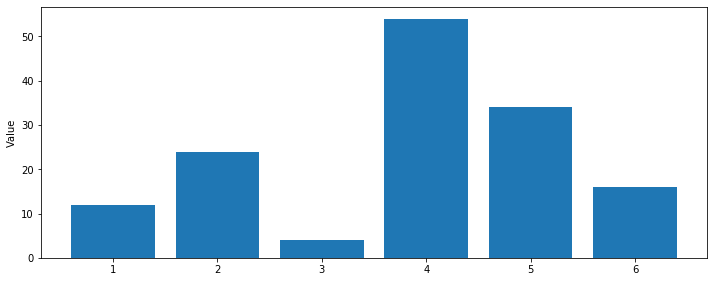

In [13]:
pl.bar(data_1, 'value')

Set the color for the bars and the figure size.

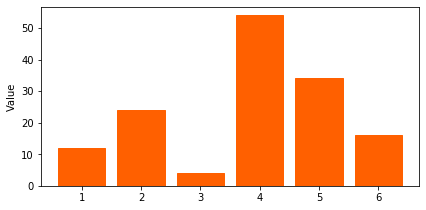

In [14]:
pl.bar(data_1, 'value', color='#FF6000', figsize=(6, 3))

Use a list with colors for the bars. If the list is to short it gets cycled.

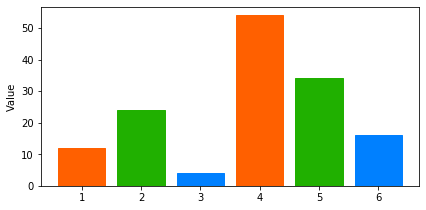

In [15]:
pl.bar(data_1, 'value', color=['#FF6000', '#20B000', '#0080FF'], figsize=(6, 3))

Use additional columns for lables and colors and customize axis labels and title.
Select custom color map for color computation.

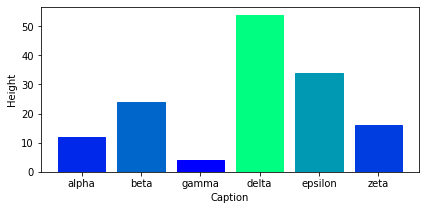

In [16]:
pl.bar(data_1, 'value', 'name',
       color_column='value', cmap='winter',
       xlabel='Caption', ylabel='Height', title='',
       figsize=(6, 3))

Use a column with color names or RGB(A) hex values for the bar colors.

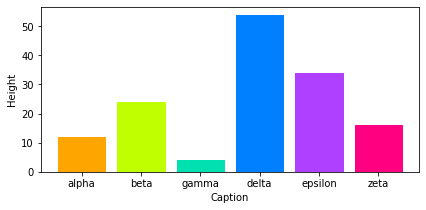

In [17]:
pl.bar(data_1, 'value', 'name',
       color_column='color',
       xlabel='Caption', ylabel='Height', title='',
       figsize=(6, 3))

## `bar_groups()`

Plot bars in groups.
Specify a key column to distribute values over groups.
A group contains one value for every key.
Groups are colored alike.

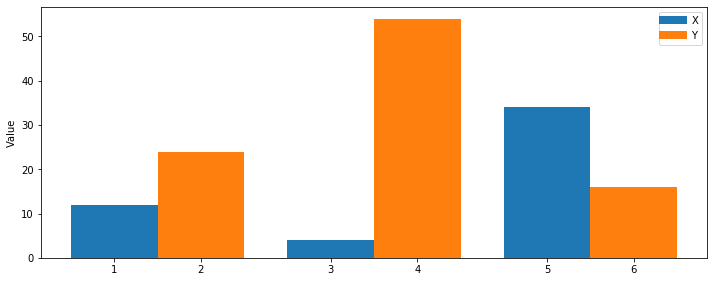

In [18]:
pl.bar_groups(data_1, 'value', key_column='group2')

Use a column for the bar labels.

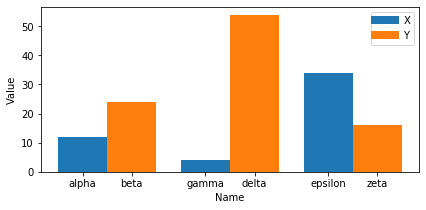

In [19]:
pl.bar_groups(data_1, 'value', key_column='group2',
              label_column='name', figsize=(6, 3))

Labels are consolidated, if they match inside every group.

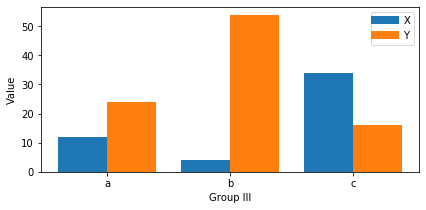

In [20]:
pl.bar_groups(data_1, 'value', key_column='group2', label_column='group3',
              figsize=(6, 3))

Switch to stacked bars.

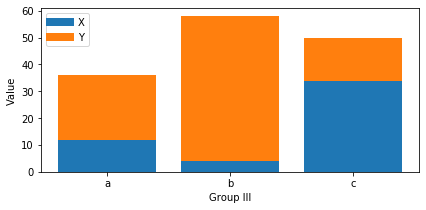

In [21]:
pl.bar_groups(data_1, 'value', key_column='group2', label_column='group3',
              stacked=True, figsize=(6, 3))

Switch to relative amounts.


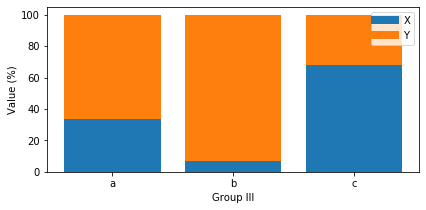

In [22]:
pl.bar_groups(data_1, 'value', key_column='group2', label_column='group3',
              stacked=True, relative=True, figsize=(6, 3))

Specify explicit colors for the keys, suppress the legend.


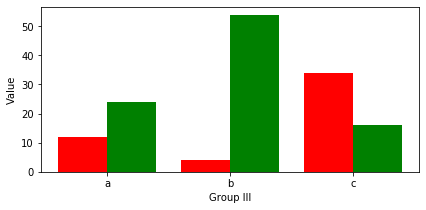

In [23]:
pl.bar_groups(data_1, 'value', key_column='group2', label_column='group3',
              color={'X': 'red', 'Y': 'green'}, legend=False, figsize=(6, 3))


Use a column with explicit color values for each bars.

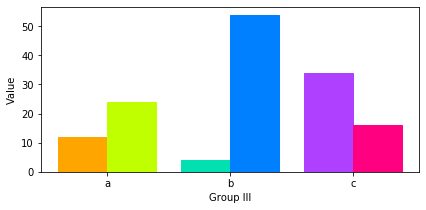

In [24]:
pl.bar_groups(data_1, 'value', 'group2', label_column='group3',
              color_column='color', figsize=(6, 3))

Use a numeric column for colors from a color map.

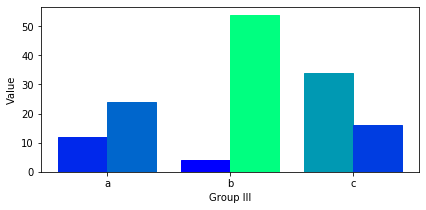

In [25]:
pl.bar_groups(data_1, 'value', 'group2', label_column='group3',
              color_column='value', cmap='winter', figsize=(6, 3))

## `line()`

In [26]:
data_3_A = data_3.groupby('group').get_group('A')

Display a line chart from one column of a DataFrame, using the index for the X axis.

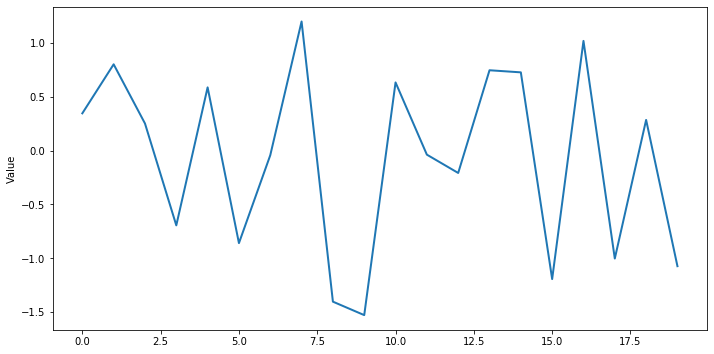

In [27]:
pl.line(data_3_A, 'value')

Display a line chart from a Series, using the index for the X axis.

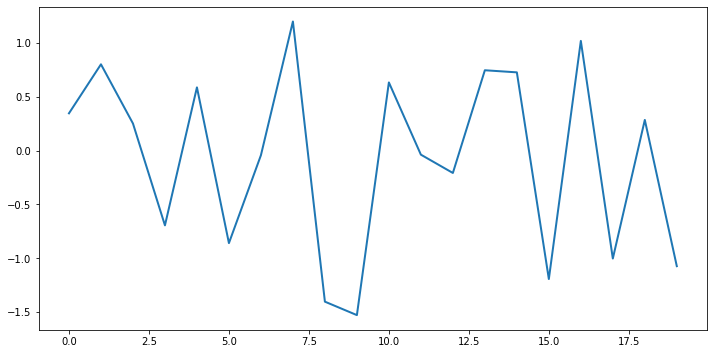

In [28]:
pl.line(data_3_A['value'])

Use another column for the X axis, set a custom label on the X axis, set a title, and specify a color for the line.

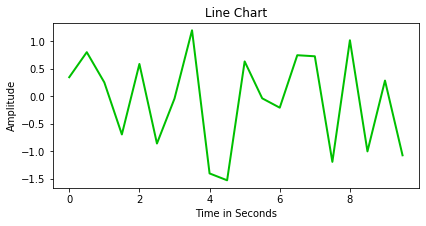

In [29]:
pl.line(data_3_A, 'value', 't', color='#00C000',
        xlabel='Time in Seconds', ylabel='Amplitude', title='Line Chart',
        figsize=(6, 3))

Smooth the data with a sliding average.

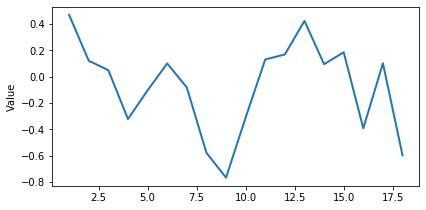

In [30]:
pl.line(data_3_A, 'value', avg_window=3, figsize=(6, 3))

Interpolate the data to display a smooth quadratic or cubic curve.

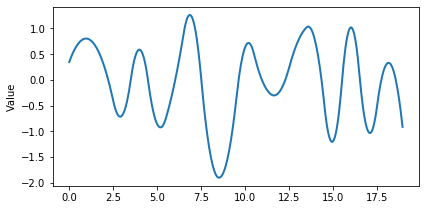

In [31]:
pl.line(data_3_A, 'value', interpolation_step=0.05, figsize=(6, 3))

## `lines()`

Show multiple lines from one column, by grouping the values by another column.

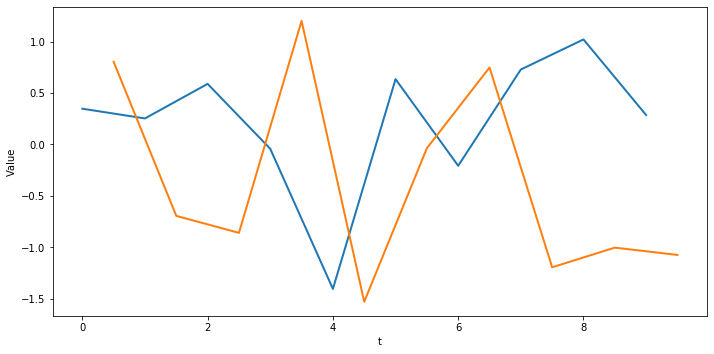

In [32]:
pl.lines(data_3_A, 'value', 't', key_column='subgroup')

Specify the colors for the keys.

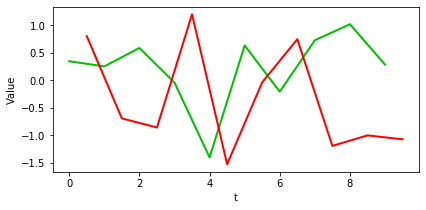

In [33]:
pl.lines(data_3_A, 'value', 't', key_column='subgroup',
         color=['#00C000', '#FF0000'],
         figsize=(6, 3))

Doing the same with labels.

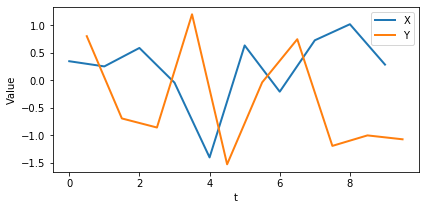

In [34]:
pl.lines(data_3_A, 'value', 't', label_column='subgroup', figsize=(6, 3))

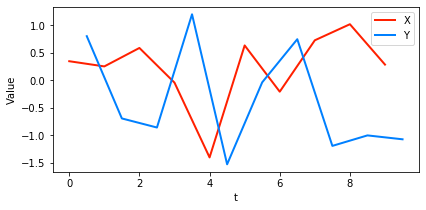

In [35]:
pl.lines(data_3_A, 'value', 't', label_column='subgroup',
         color={'X': '#FF2000', 'Y': '#0080FF'},
         figsize=(6, 3))

Group by two columns, one labelled and one without labels.

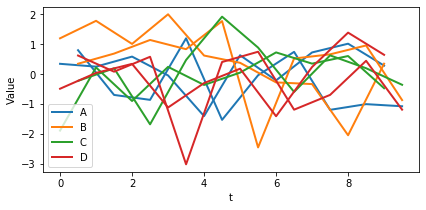

In [36]:
pl.lines(data_3, 'value', 't', label_column='group', key_column='subgroup', figsize=(6, 3))

Display values from one column indexed by another column,
grouped by two additional columns, using one of them for the labeling.
Compute a sliding average with a 3-window and apply a cubic interpolation.
Additionally, specify a custom linewidth, specify colors for the keys,
change the label of the X axis, and add a title to the plot.

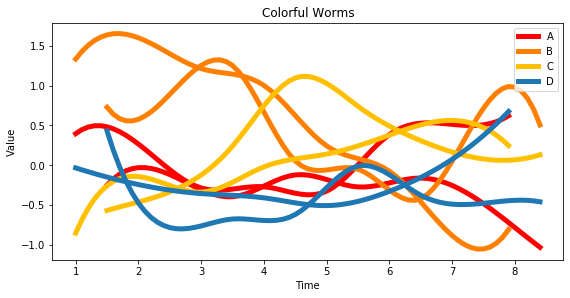

In [37]:
pl.lines(data_3, 'value', 't',
         label_column='group', key_column='subgroup',
         avg_window=3, interpolation_step=0.1, interpolation_kind='cubic',
         color={'A': '#FF0000', 'B': '#FF8000', 'C': '#FFC000'},
         linewidth=5, xlabel='Time', title='Colorful Worms', figsize=(8, 4))

## `hist()`

Display a histogram of the values from one column.

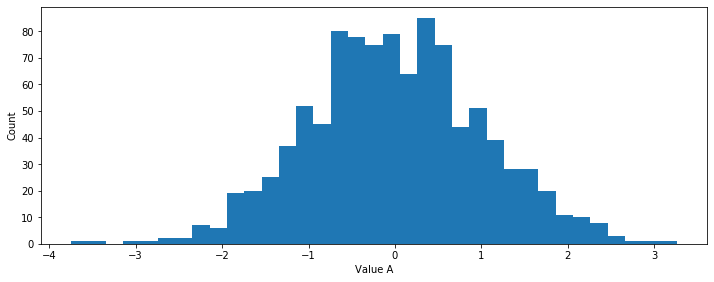

In [38]:
pl.hist(data_2, 'value_a')

Clip the displayed value range and customize bins, ticks, labels, and specify a title.

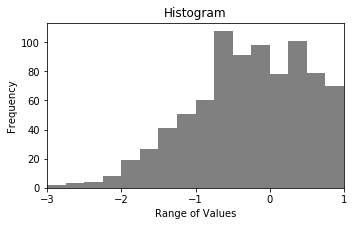

In [39]:
pl.hist(data_2, 'value_a', xmin=-3, xmax=+1,
        bins=np.arange(-3, 1.25, 0.25), ticks=np.arange(-3, 2),
        color='#808080',
        xlabel='Range of Values', ylabel='Frequency', title='Histogram',
        figsize=(5, 3))

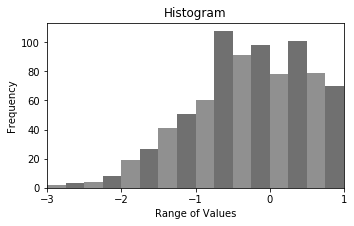

In [40]:
pl.hist(data_2, 'value_a', xmin=-3, xmax=+1,
        bins=np.arange(-3, 1.25, 0.25), ticks=np.arange(-3, 2),
        color=['#909090', '#707070'],
        xlabel='Range of Values', ylabel='Frequency', title='Histogram',
        figsize=(5, 3))

Group the values by another column and specify the colors to cycle through.

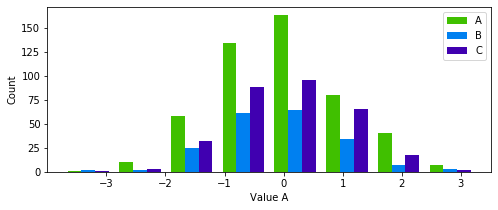

In [41]:
pl.hist(data_2, 'value_a', key_column='group', bins=8,
        color=['#40C000', '#0080F0', '#4000B0'],
        figsize=(7, 3))

Specify the colors by key.

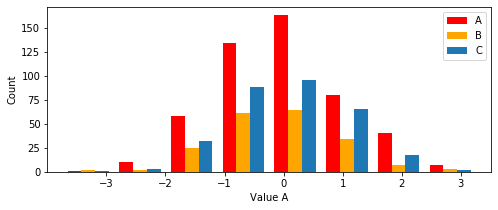

In [42]:
pl.hist(data_2, 'value_a', key_column='group', bins=8,
        color={'A': 'red', 'B': 'orange'},
        figsize=(7, 3))

## `hist2d()`

Display a 2-dimensional histogram from two columns of a DataFrame.

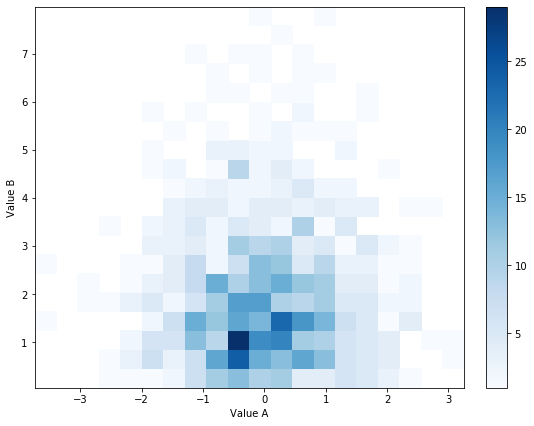

In [43]:
pl.hist2d(data_2, 'value_a', 'value_b')

Clip the X and Y axis, customize the bins, choose another color map, and add a title.

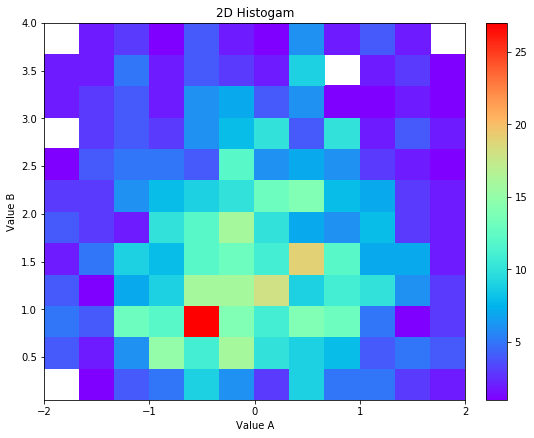

In [44]:
pl.hist2d(data_2, 'value_a', 'value_b',
          xmin=-2, xmax=2, ymax=4, bins=(12, 12), xticks=range(-2, 3),
          cmap='rainbow',
          title='2D Histogam')

## `scatter()`

Display a scatter plot from two columns of a DataFrame.

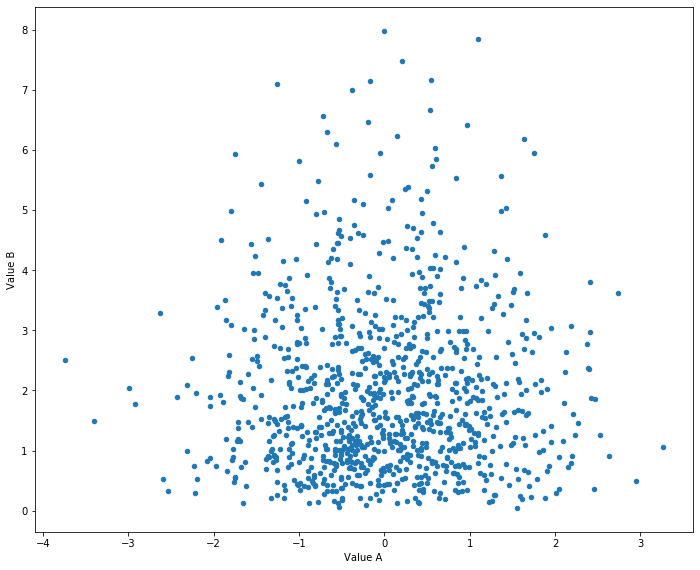

In [45]:
pl.scatter(data_2, 'value_a', 'value_b')

Use a column with explicit colors.

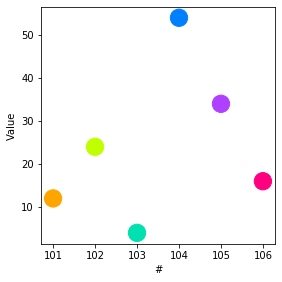

In [46]:
pl.scatter(data_1, 'id', 'value', color_column='color',
           size=15, figsize=(4, 4))

Use two additional columns to specify marker size and numeric color values together with a color map.
Specify overall marker size with factor and clip X and Y axis.

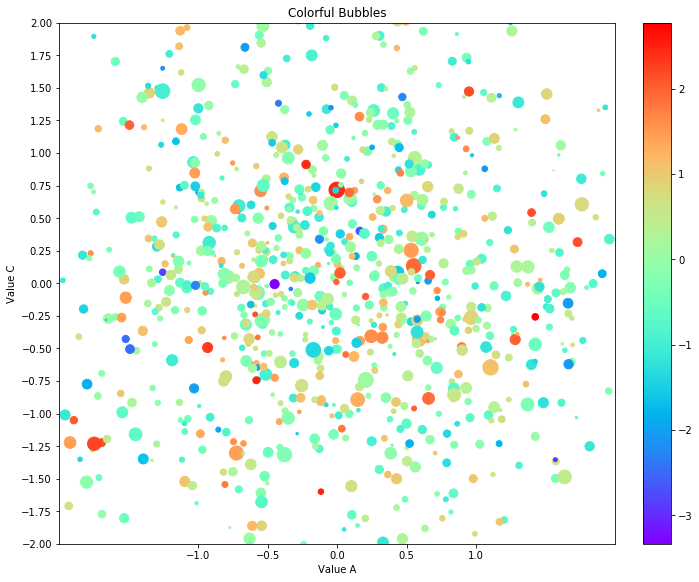

In [47]:
pl.scatter(data_2, 'value_a', 'value_c',
           size_column='value_b', size=30,
           color_column='value_d',
           xmin=-2, xmax=+2, ymin=-2, ymax=+2,
           xticks=np.arange(-1.0, 1.5, 0.5),
           yticks=np.arange(-2, 2.25, 0.25),
           title='Colorful Bubbles')

## `scatter_map()`

Display a scatter plot from two colums of a DataFrame on a map of the earth.
If not specified the columns `latitude` and `longitude` are used.

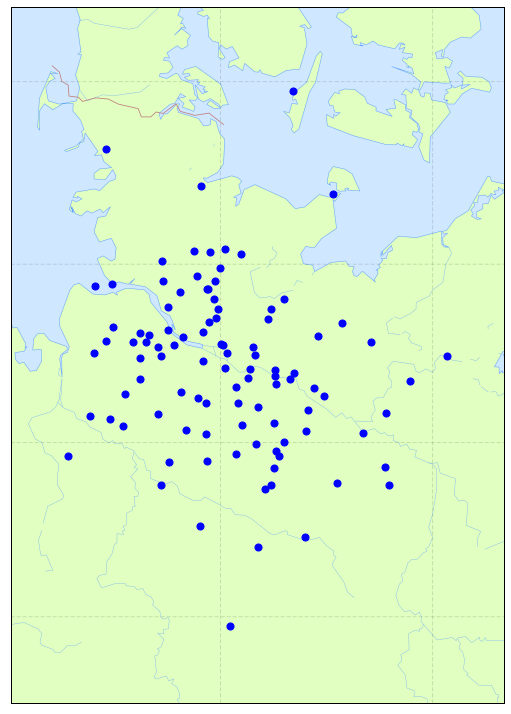

In [48]:
pl.scatter_map(data_4, size=50)

Use an additional columns for marker size and color.
Use the gray map style.

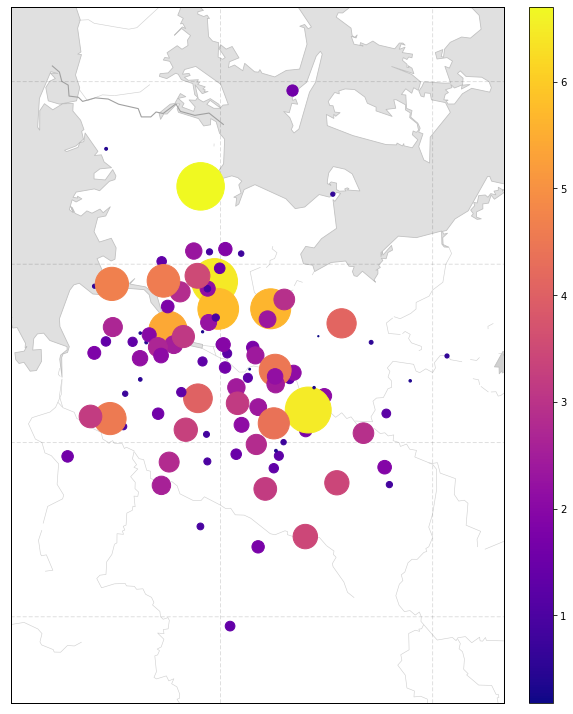

In [49]:
pl.scatter_map(data_4,
               size_column='value_b', size=4, size_mode='radius',
               color_column='value_b', cmap='plasma',
               map_style='gray')

## `begin()` and `end()`

Draw multiple subplots into a grid.

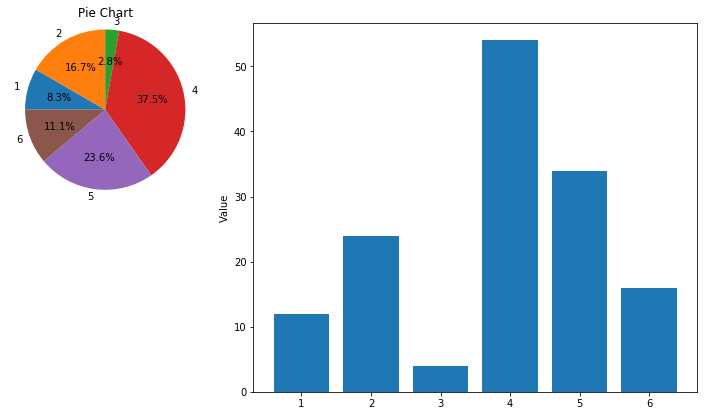

In [50]:
pl.begin(grid=(2, 3), figsize=(10, 6))
pl.pie(data_1, 'value', title='Pie Chart')
pl.bar(data_1, 'value', pos=(0, 1), rowspan=2, colspan=2)
pl.end()

## `scatter_matrix()`

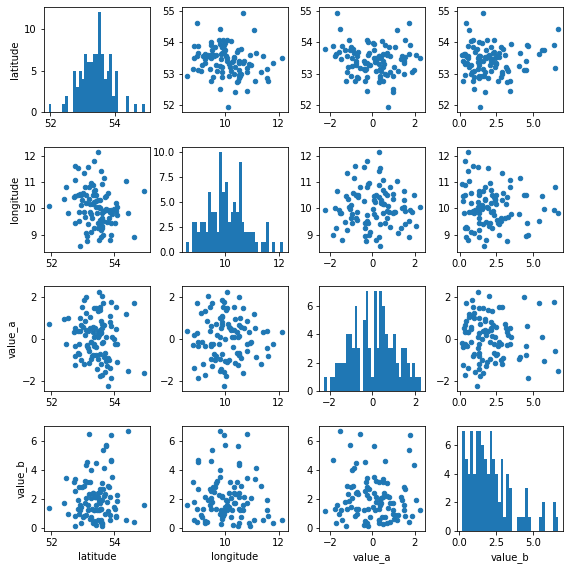

In [51]:
pl.scatter_matrix(data_4)

Select a subset of columns, define value ranges and axis ticks.

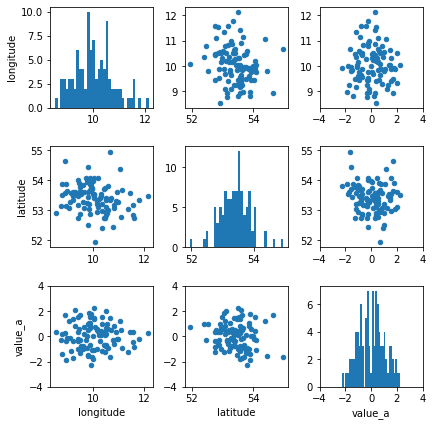

In [52]:
pl.scatter_matrix(data_4,
                  columns=['longitude', 'latitude', 'value_a'],
                  mins={'value_a': -4}, maxs={'value_a': 4},
                  ticks={'value_a': range(-4, 5, 2)})

Use a key column for grouping,
specify custom colors for the groups,
and show only a subset in the scatter plots.

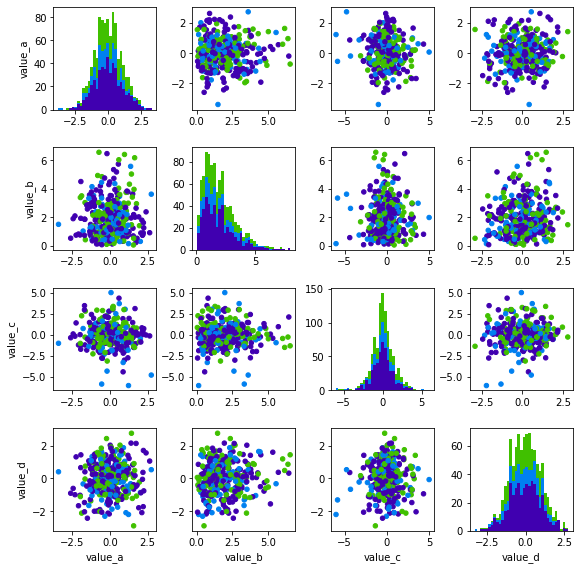

In [53]:
pl.scatter_matrix(data_2, columns=['value_' + c for c in 'abcd'],
                  key_column='group', color={'C': '#40C000', 'B': '#0080F0', 'A': '#4000B0'},
                  sample=0.33, random_state=1234)

## `hist2d_matrix()`

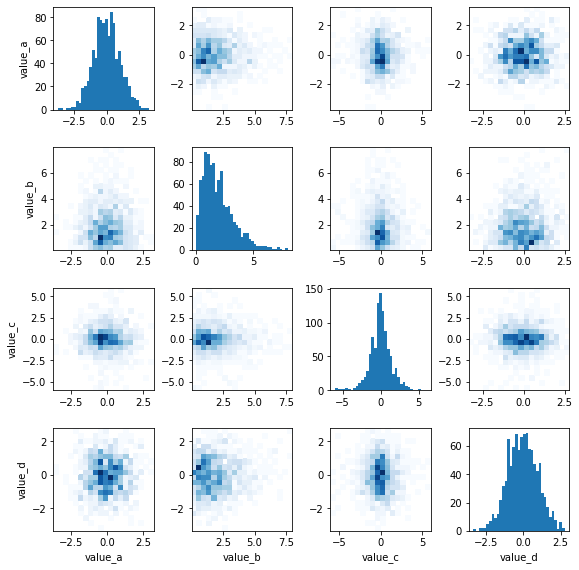

In [54]:
pl.hist2d_matrix(data_2,
                 columns=['value_a', 'value_b', 'value_c', 'value_d'])

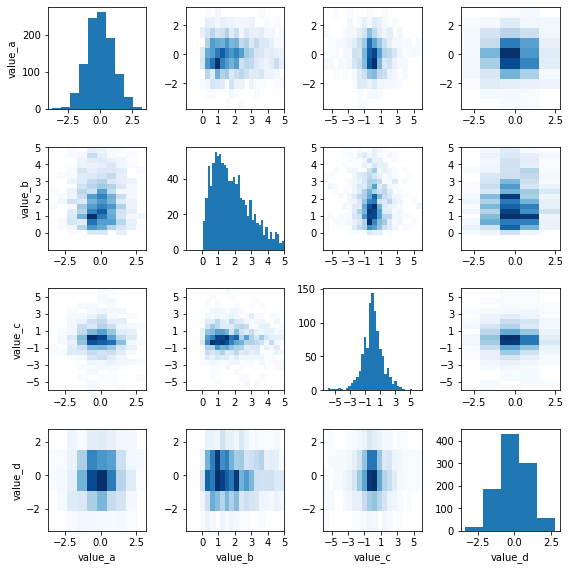

In [55]:
pl.hist2d_matrix(data_2,
                 columns=['value_a', 'value_b', 'value_c', 'value_d'],
                 mins={'value_b': -1}, maxs={'value_b': 5},
                 bins={'value_a': 10, 'value_d': 5},
                 ticks={'value_b': range(0, 6), 'value_c': range(-5, 7, 2)})